In [1]:
# uses pyCaret to find optimise model and tune it
# check version
from library.common import Core
core = Core()

from pycaret.utils import version
from pycaret.regression import *
version()

'2.3.5'

In [2]:
# Set up pyCaret Regression
# load dataset
regions_list  = core.list_of_regions
r = 1
cluster = regions_list[r]
print(cluster)
data = core.get_cluster_regression_datas(cluster = cluster, first = 1971, last = 2020)

reg0 = setup(data, target = 'co2', session_id=123, log_experiment=True,
             normalize = True, normalize_method = 'minmax',
             remove_outliers = False, outliers_threshold = 0.05, verbose = False,
             experiment_name='carbon emission Cluster 0')
best_model = compare_models(fold=8, sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,206.5240,82349.9016,259.1985,0.9900,0.0241,0.0196,0.1038
gbr,Gradient Boosting Regressor,272.8393,150286.0310,356.6111,0.9787,0.0316,0.0256,0.0238
rf,Random Forest Regressor,283.6978,176516.8534,368.1706,0.9761,0.0328,0.0263,0.1150
ada,AdaBoost Regressor,318.0013,185011.1100,410.7540,0.9720,0.0396,0.0318,0.0538
dt,Decision Tree Regressor,352.1375,282056.7681,466.8509,0.9645,0.0421,0.0343,0.0138
br,Bayesian Ridge,558.8007,448231.4316,637.3305,0.9379,0.0656,0.0569,0.0112
lasso,Lasso Regression,567.6597,474871.7974,649.0183,0.9356,0.0686,0.0582,0.0150
llar,Lasso Least Angle Regression,570.0479,476168.2658,650.6252,0.9354,0.0670,0.0577,0.0125
lr,Linear Regression,565.3933,483811.3496,652.0134,0.9345,0.0711,0.0587,1.2288
lar,Least Angle Regression,565.3941,483811.5065,652.0136,0.9345,0.0711,0.0587,0.0125


In [3]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,170.8457,55417.7950,235.4098,0.9951,0.0245,0.0175
1,104.5280,26718.9029,163.4592,0.9937,0.0165,0.0110
2,215.9013,71594.9310,267.5723,0.9956,0.0257,0.0231
3,107.3648,21195.0433,145.5852,0.9984,0.0196,0.0146
4,144.8980,22253.0367,149.1745,0.9984,0.0165,0.0146
5,384.1988,234492.3273,484.2441,0.9542,0.0359,0.0294
6,124.0710,16589.7074,128.8010,0.9966,0.0166,0.0149
7,180.7516,50159.0888,223.9622,0.9960,0.0193,0.0158
8,233.0521,84379.2698,290.4811,0.9867,0.0259,0.0219
9,222.6339,79080.9063,281.2133,0.9945,0.0214,0.0185


In [4]:
tuned_model = tune_model(model, n_iter=50, optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,312.2606,167462.7800,409.2222,0.9852,0.0396,0.0310
1,275.6847,200247.4079,447.4901,0.9525,0.0444,0.0297
2,390.3369,184088.6331,429.0555,0.9887,0.0480,0.0460
3,211.3501,68834.1058,262.3625,0.9949,0.0405,0.0301
4,286.7531,111721.1336,334.2471,0.9920,0.0283,0.0255
5,326.9136,131033.1135,361.9850,0.9744,0.0277,0.0258
6,497.0352,352482.5884,593.7024,0.9280,0.0538,0.0480
7,370.6783,247854.8295,497.8502,0.9804,0.0352,0.0296
8,285.3333,117676.4262,343.0400,0.9814,0.0432,0.0316
9,375.7589,149583.1841,386.7599,0.9896,0.0423,0.0415


In [5]:
tuned_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=8, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.005,
                    min_impurity_split=None, min_samples_leaf=3,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=180, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

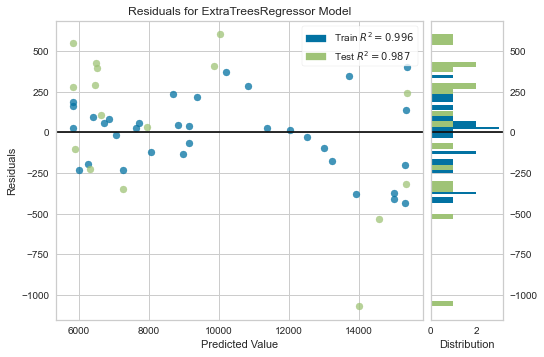

In [6]:
plot_model(tuned_model)

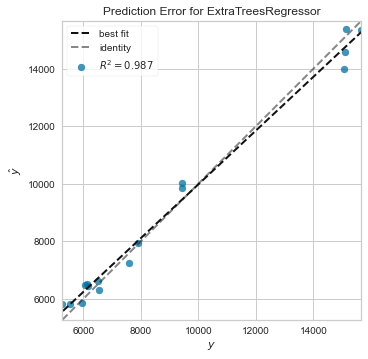

In [7]:

plot_model(tuned_model, plot = 'error')

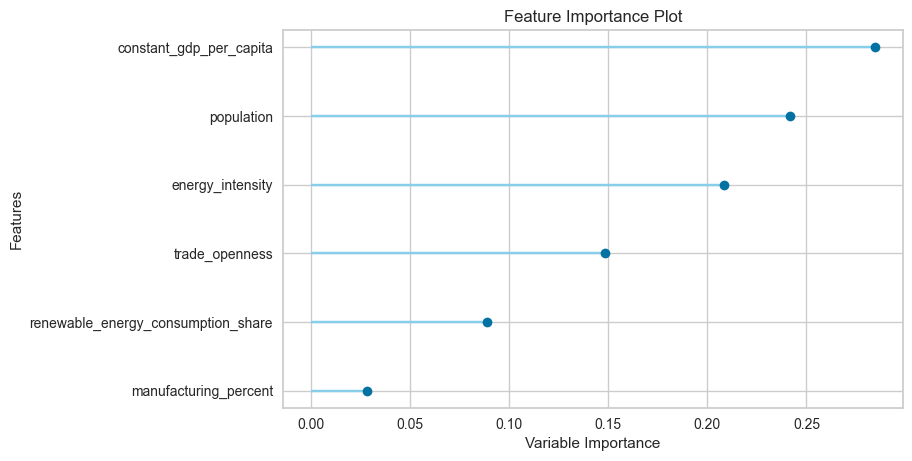

In [8]:

plot_model(tuned_model, plot = 'feature')

In [9]:

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

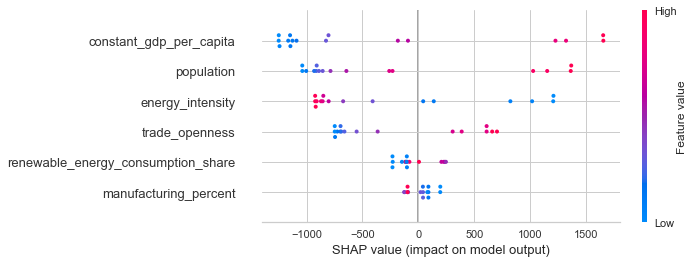

In [10]:
interpret_model(tuned_model)


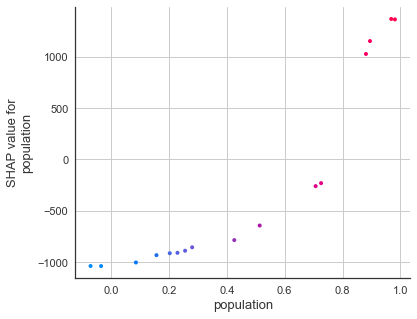

In [11]:
interpret_model(tuned_model, plot = 'correlation')

In [12]:
interpret_model(tuned_model, plot = 'reason', observation = 12)